# <center>Bad Bank Behavior<br>Analyzing Bank Mortgage during the 2008 Housing Bubble</center>  

<center>Michael Siebel</center>
<center>December 2020</center>

<br>
    
## <center>Data Mining Script</center>

# Goals  
<br>

 

***

# Load Functions

In [1]:
# Load functions
%run Functions.ipynb
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', 200)

# Load data
file_to_open = open('..\Data\Pickle\df.pkl', 'rb') 
df = pickle.load(file_to_open) 
file_to_open.close()

# Drop unused variables
# Variables to drop
dropvars = ['Year', 'Month', 'Region', 'Zero Balance Code', 
            'Mortgage Insurance Type', 
            'First Payment', 'Original Loan-to-Value (LTV)']
df = df.drop(labels=dropvars, axis=1)
df = df.filter(regex=r'^(?!Asset).*$')
df = df.filter(regex=r'^(?!Liab).*$')
df = df.filter(regex=r'^(?!Eqtot).*$')
df = df.filter(regex=r'^(?!Dep).*$')
df = df.dropna()

file_to_open = open('..\Data\Pickle\df_load.pkl', 'rb') 
df_load = pickle.load(file_to_open) 
file_to_open.close()

# Variables to drop
dropvars = ['Year', 'Month', 'Zero Balance Code', 
            'Mortgage Insurance Type', 
            'First Payment', 'Original Loan-to-Value (LTV)']
df_load = df_load.drop(labels=dropvars, axis=1)
df_load = df_load.dropna()

# Convert Inf values to NA
df = df.replace([np.inf, -np.inf], np.nan)
df_load = df_load.replace([np.inf, -np.inf], np.nan)

# Set up plots
jtplot.style(ticks=True, grid=False)
import plotly.io as pio
from IPython.display import HTML
from PIL import Image

Using TensorFlow backend.


***

# Foreclosure Descriptive Statistics

In [2]:
print('Year 2006')
print(df_load.loc[df_load['File Year']==2006, 'Bank'].value_counts())
print('\n')

print('Year 2007')
print(df_load.loc[df_load['File Year']==2007, 'Bank'].value_counts())
print('\n')

print('Year 2008')
print(df_load.loc[df_load['File Year']==2008, 'Bank'].value_counts())

Year 2006
Other                276077
Bank of America      243801
CitiMortgage         107951
GMAC Mortgage         91385
Wells Fargo Bank      89771
JPMorgan Chase        75524
SunTrust Mortgage     74574
AmTrust Bank          37990
PNC Bank              30139
Flagstar Bank         27714
Name: Bank, dtype: int64


Year 2007
Bank of America      364653
Other                248994
CitiMortgage         130279
JPMorgan Chase        98684
Wells Fargo Bank      98305
GMAC Mortgage         77344
PNC Bank              62261
SunTrust Mortgage     51888
AmTrust Bank          37636
Flagstar Bank         33823
Name: Bank, dtype: int64


Year 2008
Other                327353
Bank of America      266453
JPMorgan Chase       227541
Wells Fargo Bank     200059
CitiMortgage         144613
SunTrust Mortgage     82301
GMAC Mortgage         71930
AmTrust Bank          62165
Flagstar Bank         50376
PNC Bank              37215
Name: Bank, dtype: int64


In 2006 and 2005, **FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB** did not make enough loans to be displayed in the data.

In 2005, **PNC BANK, N.A** did not make enough loans to be displayed in the data.

In [3]:
print('Year 2006')
display(Overall_Data(df = df_load, subset = "df_load['File Year']==2006").iloc[:,:2])
print('\n')

print('Year 2007')
display(Overall_Data(df = df_load, subset = "df_load['File Year']==2007").iloc[:,:2])
print('\n')

print('Year 2008')
display(Overall_Data(df = df_load, subset = "df_load['File Year']==2008").iloc[:,:2])
print('\n')

print('All Years')
display(Overall_Data(df = df_load, subset = "df_load['File Year']>=2006").iloc[:,:2])
print('\n')

print('Isolating Other Loans (All Years)')
subset = "(df_load['File Year']>=2006) & (df_load['Bank']=='Other')"
display(Overall_Data(df = df_load, subset = subset).iloc[:,:2])

Year 2006


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,91.9,969067
Foreclosed,8.1,85859




Year 2007


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,90.6,1091008
Foreclosed,9.4,112859




Year 2008


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,94.2,1385215
Foreclosed,5.8,84791




All Years


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,92.4,3445290
Foreclosed,7.6,283509




Isolating Other Loans (All Years)


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,94.2,802767
Foreclosed,5.8,49657


**Other**, smaller, banks constitute much fewer foreclosures (**5.9%**) compared to the big banks.  Removing them from the dataset should increase the proportion of foreclosures.

In [4]:
# Drop other banks
df_load = df_load.loc[df_load['Bank'] != 'Other',:]

In [5]:
print('Year 2006')
display(Overall_Data(df = df, subset = "df['File Year']==2006").iloc[:,:2])
print('\n')

print('Year 2007')
display(Overall_Data(df = df, subset = "df['File Year']==2007").iloc[:,:2])
print('\n')

print('Year 2008')
display(Overall_Data(df = df, subset = "df['File Year']==2008").iloc[:,:2])
print('\n')

print('All Years')
display(Overall_Data(df = df, subset = "df['File Year']>=2006").iloc[:,:2])

Year 2006


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,91.0,594212
Foreclosed,9.0,59043




Year 2007


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,89.8,768752
Foreclosed,10.2,87619




Year 2008


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,89.9,91933
Foreclosed,10.1,10322




All Years


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,90.3,1454897
Foreclosed,9.7,156984


Removing **Other**, smaller, banks increased foreclosures from **7.7%** to **9.6%**.

In [6]:
# Quarter Version
YrQtr = {}
Qtr = ('Q1', 'Q2', 'Q3', 'Q4')
Yr = range(2006,2009)
i = 0
for yr in Yr:
    for qtr in Qtr:
        YrQtr[i] = str(str(yr) + qtr)
        i += 1
        
# Short Version
YrShort = {}
Yr = range(2006,2009)
i = 0
for yr in Yr:
    YrShort[i] = str(yr)
    i += 1
       
# Long Version
df_YrLong = {}
YrLong = {}
Yr = range(2001,2009)
i = 0
for yr in Yr:
    YrLong[i] = int(yr)
    i += 1
        
print('Number in quarter time series', len(YrQtr))
print('Number in short time series', len(YrShort))
print('Number in long time series', len(YrLong))

Number in quarter time series 12
Number in short time series 3
Number in long time series 8


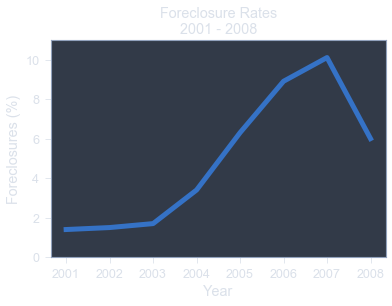

<Figure size 1152x720 with 0 Axes>

In [7]:
plot_yr = {}
plot_df = pd.DataFrame(index=['Foreclosed (%)'], columns=YrLong.values())

for j in range(len(YrLong)):
    plot_yr[j] = Overall_Data(YrQtr = YrLong[j], df = df_load).iloc[1,0]
    plot_df.iloc[:,j] = plot_yr[j]
    
fig, ax = plt.subplots()
fig = plt.figure(figsize=(16,10))
ax.plot(plot_df.columns, plot_df.iloc[0,:], linewidth=5, alpha=1)

ax.set_title('Foreclosure Rates\n2001 - 2008')
ax.axis(ymin=0, ymax=11)
ax.set_ylabel('Foreclosures (%)')
ax.set_xlabel('Year')

plt.show()

(0, 100)

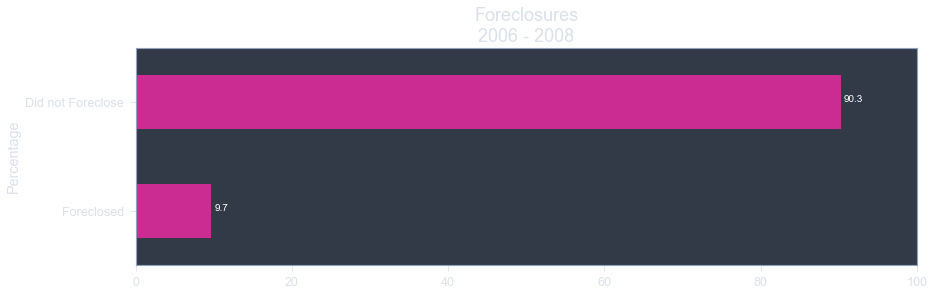

In [8]:
# Foreclosures
Foreclosed = Overall_Data(df = df)

# Graphing target variable
fig = plt.figure(figsize=(14,4))
bars = Foreclosed.loc[:, 'Foreclosed (%)']
bars.plot.barh(color='#ca2c92').invert_yaxis()

plt.title(str('Foreclosures\n2006 - 2008'), fontsize=18)

# Labels
ls = bars.values
xs = bars.values
ys = np.array([0, 1])
for x,y,l in zip(xs,ys,ls):
    label = "{:.1f}".format(l)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(3,0), # distance from text to points (x,y)
                 color='white',
                 ha='left') # horizontal alignment can be left, right or center

plt.ylabel('Percentage')
plt.xlim([0,100])

In [9]:
gif_frames = list()
for i in range(len(YrQtr)):
    
    # Foreclosures
    Foreclosed = Overall_Data(YrQtr = YrQtr[i], df = df)
    
    # Graphing target variable
    fig = plt.figure(figsize=(14,4))
    bars = Foreclosed.loc[:, 'Foreclosed (%)']
    bars.plot.barh(color='#ca2c92').invert_yaxis()
    plt.title(str('Foreclosures for ' + YrQtr[i]), fontsize=18)
    
    # Labels
    ls = bars.values
    xs = bars.values
    ys = np.array([0, 1])
    for x,y,l in zip(xs,ys,ls):
        label = "{:.1f}".format(l)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(3,0), # distance from text to points (x,y)
                     color='white',
                     ha='left') # horizontal alignment can be left, right or center

    plt.ylabel('Percentage')
    plt.xlim([0,100])
    
    plt.savefig(str("GIF_Frames/Foreclosures_" + str(i) + ".png"), transparent=False)
    plt.close(fig)
    gif = Image.open(str("GIF_Frames/Foreclosures_" + str(i) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Foreclosures.gif">')

### Geographical Representation of Foreclosures

State Foreclosures

In [10]:
fig = {}
frames = list()
gif_frames = list()

for i in range(len(YrLong)):
    # Foreclosures
    State_Foreclosures = df_load.loc[df_load['File Year']==YrLong[i],:] \
                         .groupby(['Property State']).agg({'Foreclosed': 'mean'})*100
    State_Foreclosures = State_Foreclosures.round(1)
    
    # Graph
    fig[i] = go.Figure(data=go.Choropleth(
        locations=State_Foreclosures.index, # Spatial coordinates
        z = State_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
        zmin = 0,
        zmax = 30,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = px.colors.sequential.Purples[3:],
        marker_line_color=px.colors.sequential.Purples[3],
        colorbar_title = "Forclosures (%)"
    ))
    
    fig[i].update_layout(
        title_text = str("Forclosures by State, " + str(YrLong[i])),
        geo_scope='usa', # limite map scope to USA
        margin={"r":0,"l":0,"b":0}
    )
    
    pio.write_image(fig[i], str("GIF_Frames/State_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif = Image.open(str("GIF_Frames/State_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/State_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/State_Foreclosures.gif">')

Foreclosures by Zip Code

In [11]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
# Import county zipcode crosswalk
crosswalk = pd.read_csv("..\Data\ZIP-COUNTY-FIPS_2017-06.csv",
                        header = 0)
crosswalk = crosswalk.rename(columns={'ZIP': 'Zip Code', 'COUNTYNAME': 'County', 'STCOUNTYFP': 'FIPS'})
crosswalk = crosswalk.loc[:, ['Zip Code', 'County', 'FIPS']]
crosswalk['Zip 5'] = crosswalk['Zip Code']
crosswalk['Zip Code'] = crosswalk['Zip Code'].astype(str)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.slice(start=0, stop=-2)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.ljust(3, '0')
crosswalk['FIPS'] = crosswalk['FIPS'].astype(str)
crosswalk['FIPS'] = crosswalk['FIPS'].str.rjust(5, '0')

In [12]:
fig = {}
frames = list()
gif_frames = list()

for i in range(len(YrLong)):
    # Foreclosures
    FIPS_Foreclosures = df_load.loc[df_load['File Year']==YrLong[i],:] \
                        .groupby(['Zip Code']).agg({'Foreclosed': 'mean'})*100
    FIPS_Foreclosures = FIPS_Foreclosures.round(1)
    FIPS_Foreclosures = FIPS_Foreclosures.reset_index()
    FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].astype(int).astype(str)
    FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].str.ljust(3, '0')
    
    # Merge
    FIPS_Foreclosures = pd.merge(FIPS_Foreclosures, crosswalk, on='Zip Code', how='inner')
    
    # Remove Outliers
    FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=100, :]
    FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=50, :]
    
    # Graph
    fig[i] = go.Figure(data=go.Choropleth(
        locations = FIPS_Foreclosures['FIPS'], # Spatial coordinates
        z = FIPS_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
        zmin = 0,
        zmax = 30,
        locationmode = 'geojson-id', # set of locations match entries in `locations`
        geojson = counties,
        colorscale = px.colors.sequential.Blues[3:],
        marker_line_color=px.colors.sequential.Blues[3], 
        colorbar_title = "Forclosures (%)"
    ))
    
    fig[i].update_layout(
        title_text = str("Forclosures by Zip Code, " + str(YrLong[i])),
        geo_scope='usa', # limite map scope to USA
        margin={"r":0,"l":0,"b":0}
    )
    
    pio.write_image(fig[i], str("GIF_Frames/Zip_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif = Image.open(str("GIF_Frames/Zip_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/Zip_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Zip_Foreclosures.gif">')

***

# Bank Descriptive Statistics

In [13]:
Banks = Bank_Data(df = df)
Banks

,Bank (%),Bank (N),Foreclosed (%)
Bank,,,
AmTrust Bank,1.5,23379,9.3
Bank of America,39.4,634572,11.6
CitiMortgage,15.2,245181,7.7
Flagstar Bank,3.9,63255,11.7
GMAC Mortgage,10.5,168946,9.7
JPMorgan Chase,11.9,191480,7.6
PNC Bank,1.0,15570,8.8
SunTrust Mortgage,4.4,70591,10.3
Wells Fargo Bank,12.3,198907,7.6


In [14]:
# Banks represented
Banks[['Bank (%)', 'Bank (N)', 'Foreclosed (%)']]

,Bank (%),Bank (N),Foreclosed (%)
Bank,,,
AmTrust Bank,1.5,23379,9.3
Bank of America,39.4,634572,11.6
CitiMortgage,15.2,245181,7.7
Flagstar Bank,3.9,63255,11.7
GMAC Mortgage,10.5,168946,9.7
JPMorgan Chase,11.9,191480,7.6
PNC Bank,1.0,15570,8.8
SunTrust Mortgage,4.4,70591,10.3
Wells Fargo Bank,12.3,198907,7.6


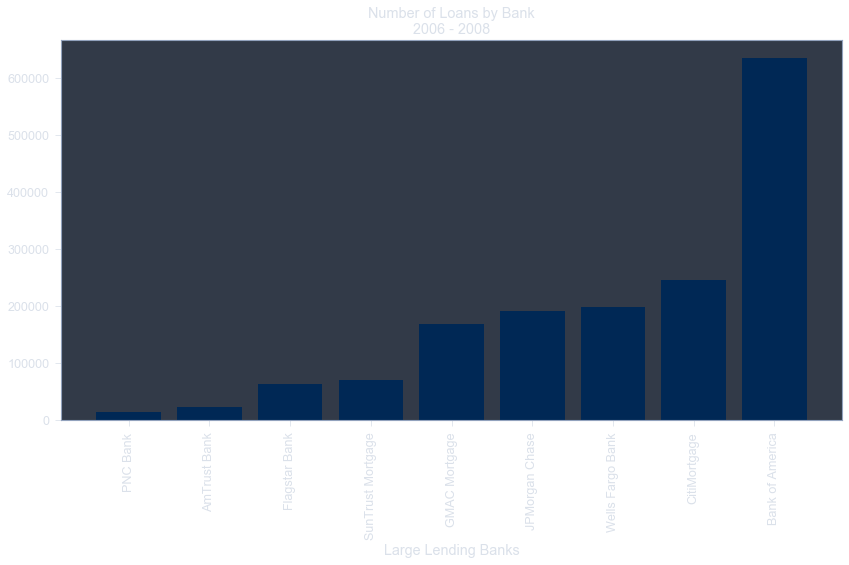

In [15]:
bnk_size = Banks[['Bank (N)']].sort_values(by=['Bank (N)'])
fig = plt.figure(figsize=[14,7])
plt.bar(bnk_size.index, bnk_size.loc[:,'Bank (N)'], color = '#002855')
plt.xticks(rotation=90)
plt.title('Number of Loans by Bank\n2006 - 2008')
plt.xlabel('Large Lending Banks')

plt.show()

### Foreclosures

In [16]:
# Worst actor
worst_actor = pd.DataFrame()
for i in range(len(YrShort)):
    print(YrShort[i])
    Banks_short = Bank_Data(YrQtr = YrShort[i], df = df, rounding = 5)
    tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = max)
    tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
    display(tbl)
    tbl = tbl.reset_index()
    tbl.index = [YrShort[i]]
    worst_actor = pd.concat([worst_actor, tbl], axis = 0)
    print('')

print('Overall')
Banks_short = Bank_Data(df = df, rounding = 5)
tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = max)
tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
display(tbl)
tbl = tbl.reset_index()
tbl.index = ['Overall']
worst_actor = pd.concat([worst_actor, tbl], axis = 0)

2006


,Foreclosed (%)
Bank,
Flagstar Bank,11.6



2007


,Foreclosed (%)
Bank,
Bank of America,12.0



2008


,Foreclosed (%)
Bank,
SunTrust Mortgage,13.3



Overall


,Foreclosed (%)
Bank,
Flagstar Bank,11.7


In [17]:
# Best actor
best_actor = pd.DataFrame()
for i in range(len(YrShort)):
    print(YrShort[i])
    Banks_short = Bank_Data(YrQtr = YrShort[i], df = df, rounding = 5)
    tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = min)
    tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
    display(tbl)
    tbl = tbl.reset_index()
    tbl.index = [YrShort[i]]
    best_actor = pd.concat([best_actor, tbl], axis = 0)
    print('')

print('Overall')
Banks_short = Bank_Data(df = df, rounding = 5)
tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = min)
tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
display(tbl)
tbl = tbl.reset_index()
tbl.index = ['Overall']
best_actor = pd.concat([best_actor, tbl], axis = 0)

2006


,Foreclosed (%)
Bank,
Wells Fargo Bank,7.0



2007


,Foreclosed (%)
Bank,
JPMorgan Chase,7.7



2008


,Foreclosed (%)
Bank,
CitiMortgage,7.6



Overall


,Foreclosed (%)
Bank,
Wells Fargo Bank,7.6


In [18]:
worst_best_tbl = pd.concat([worst_actor, best_actor], axis=1)
header = [np.array(['Worst Actors','Worst Actors','Best Actors','Best Actors']), 
          np.array(worst_best_tbl.columns)] 
pd.DataFrame(worst_best_tbl.values, index = worst_best_tbl.index, columns = header )   

Worst Actors                      Best Actors               
                      Bank Foreclosed (%)              Bank Foreclosed (%)
2006         Flagstar Bank           11.6  Wells Fargo Bank              7
2007       Bank of America             12    JPMorgan Chase            7.7
2008     SunTrust Mortgage           13.3      CitiMortgage            7.6
Overall      Flagstar Bank           11.7  Wells Fargo Bank            7.6

***

# Foreclosures per Bank

In [19]:
plt.close()
gif_frames = []
plot_yr = {}
plot_df = pd.DataFrame(index=Banks.index, columns=YrLong.values())

# Mortgage Amount ($) line chart
for j in range(len(YrLong)):
    plot_yr[j] = pd.DataFrame(Bank_Data(YrQtr = YrLong[j], df = df_load).loc[:, 'Foreclosed (%)'])
    plot_yr[j][plot_yr[j]==0] = np.nan
    plot_yr[j] = plot_yr[j].rename(columns={'Foreclosed (%)': YrLong[j]})
    plot_df.loc[:,YrLong[j]] = plot_yr[j].loc[:,YrLong[j]]

plt.rcParams['figure.figsize']=(16,10) 
plot_dfs = pd.DataFrame(index=Banks.index, columns=YrLong.values()).T
for j in range(len(plot_dfs.columns)):
    for i in range(len(plot_dfs.index)):
        plot_dfs.iloc[:i+1,j] = plot_df.T.iloc[:i+1,j]
        fig, ax = plt.subplots()
        ax.plot(plot_dfs.index, plot_dfs, linewidth=5, alpha=1)
        plt.gca().set_prop_cycle(None)
        ax.plot(plot_df.T.index, plot_df.T, linewidth=2, alpha=0.33)

        ax.set_title('Bank Foreclosure Rates\n' + plot_dfs.columns[j] + ' ' + str(YrLong[i]))
        plt.axis(ymin=0, ymax=13)
        ax.set_ylabel('Foreclosures (%)')
        ax.set_xlabel('Year of Lending')
        ax.legend(plot_df.T.columns, loc='lower right', fontsize=12)
        
        plt.savefig(str("GIF_Frames/Bank_Foreclosures_Yr_" + plot_dfs.columns[j] + '_' + str(YrLong[i]) + ".png"), transparent=False)
        plt.close(fig)
        gif = Image.open(str("GIF_Frames/Bank_Foreclosures_Yr_" + plot_dfs.columns[j] + '_' + str(YrLong[i]) + ".png"))
        gif_frames.append(gif)
        
# Save GIF
gif_frames[0].save('GIF_Frames/Bank_Foreclosures_Yr.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=200, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Bank_Foreclosures_Yr.gif">')       

***

# Features Likely to Define Foreclosures

In [165]:
# Load predicted probabilities
## Improved assumptions
improved = pickle.load(open("..\Data\Pickle\pred_votes_better.pkl", "rb"))[0]
improved_values = pickle.load(open("..\Data\Pickle\pred_votes_better.pkl", "rb"))[1]
best = pickle.load(open("..\Data\Pickle\pred_votes_better.pkl", "rb"))[2]
best_values = pickle.load(open("..\Data\Pickle\pred_votes_better.pkl", "rb"))[3]

## Weakened assumptions
weakened = pickle.load(open("..\Data\Pickle\pred_votes_worse.pkl", "rb"))[0]
weakened_values = pickle.load(open("..\Data\Pickle\pred_votes_worse.pkl", "rb"))[1]
worst = pickle.load(open("..\Data\Pickle\pred_votes_worse.pkl", "rb"))[2]
worst_values = pickle.load(open("..\Data\Pickle\pred_votes_worse.pkl", "rb"))[3]

# Credit Score

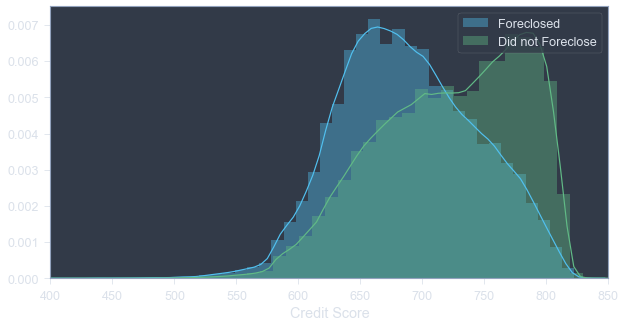

                   Credit Score
Foreclosed                     
Did not Foreclose           722
Foreclosed                  688


In [166]:
feature_density('Credit Score', bins=None, l_xlim=300, r_xlim=850)

,Credit Score
All Banks,719
GMAC Mortgage,710
Bank of America,714
Flagstar Bank,717
AmTrust Bank,723
CitiMortgage,724
SunTrust Mortgage,724
Wells Fargo Bank,726
JPMorgan Chase,727
PNC Bank,728


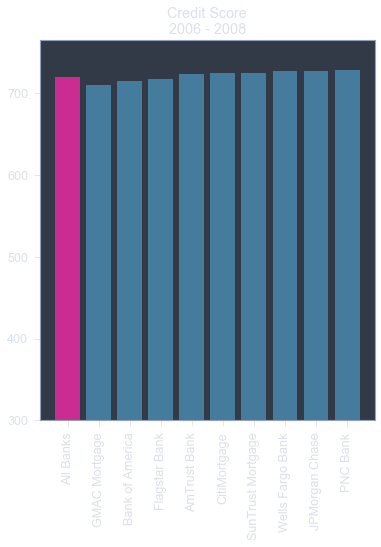

In [203]:
credit_score = Bank_Data(df = df, allvars = True)[['Credit Score']]
bank_rank_gph('Credit Score', df, credit_score, b_ylim=300)

,Bank,Credit Score
Worst Bank,GMAC Mortgage,710
Best Bank,PNC Bank,728
Average,Overall,721


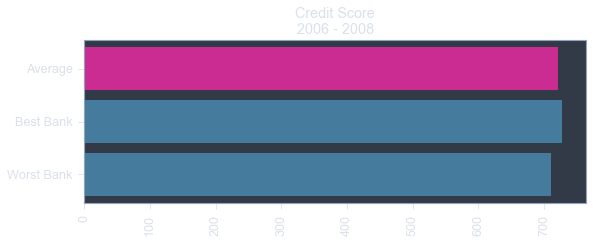

In [168]:
best_worst_gph('Credit Score', df = credit_score, l_xlim=300)

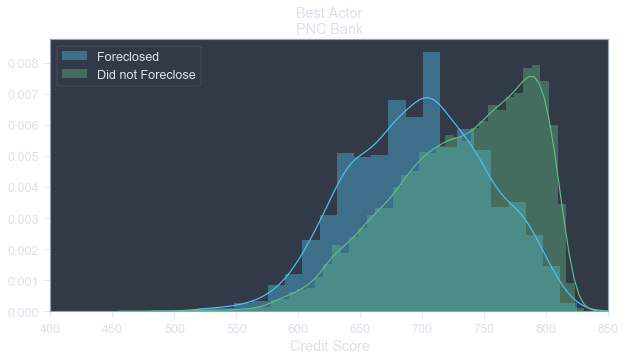

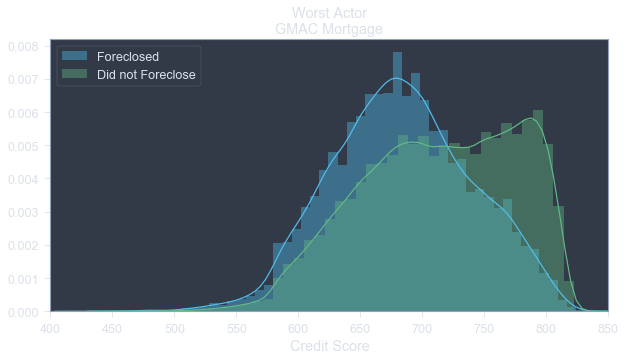

In [169]:
best_worst_density('Credit Score', df, credit_score, bins=None, l_xlim=300, r_xlim=850)

### Predictions

In [218]:
changed_assumptions_tbl('Credit Score', improved, weakened)

,Foreclosures,Improved,Weakened
,(2006-2008),Credit Score,Credit Score
Bank of America,11.6,1.9,17.3
Wells Fargo Bank,7.6,1.2,11.9
CitiMortgage,7.7,1,11.3
JPMorgan Chase,7.6,1.6,10.9
GMAC Mortgage,9.7,1,12.2
SunTrust Mortgage,10.3,1.6,13
AmTrust Bank,9.3,2.8,12.3
PNC Bank,8.8,3.1,13.8
Flagstar Bank,11.7,2.1,15.8


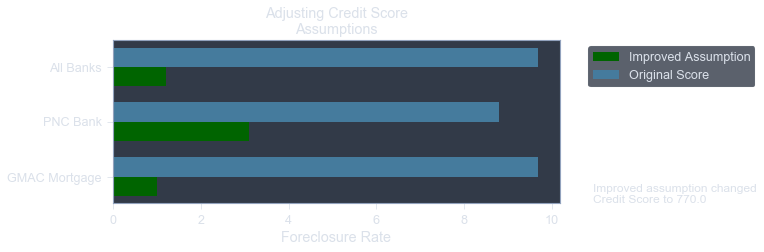

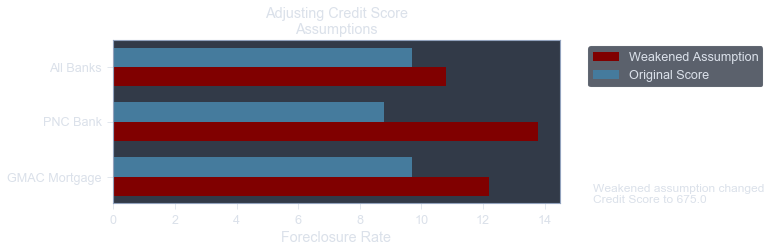

In [170]:
predicted_gph('Credit Score', df = credit_score, proba = improved, proba_value = improved_values)

predicted_gph('Credit Score', df = credit_score, proba = weakened, proba_value = weakened_values, 
              improved=False)

***

# Debt to Income

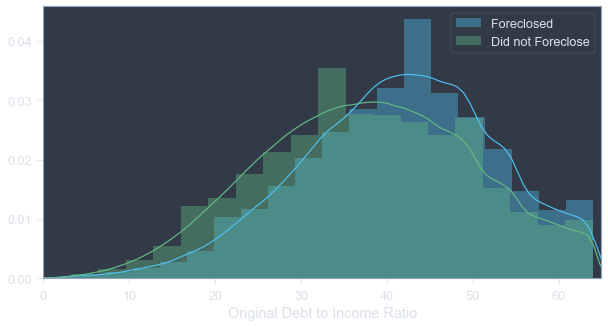

                   Original Debt to Income Ratio
Foreclosed                                      
Did not Foreclose                           37.8
Foreclosed                                  41.4


In [171]:
feature_density('Original Debt to Income Ratio', bins=20, l_xlim=0, r_xlim=65)

,Original Debt to Income Ratio
Average,38.0
CitiMortgage,35.3
JPMorgan Chase,37.1
Bank of America,38.4
PNC Bank,38.5
SunTrust Mortgage,38.6
AmTrust Bank,38.7
Wells Fargo Bank,39.0
GMAC Mortgage,39.9
Flagstar Bank,40.9


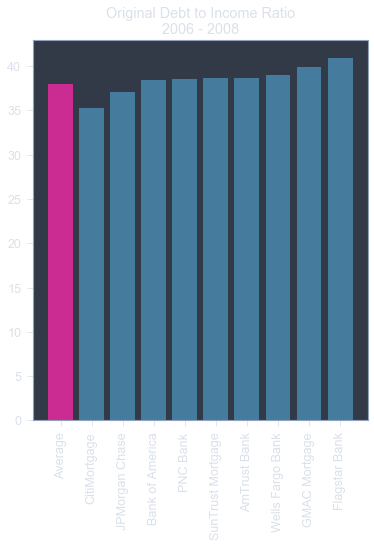

In [172]:
dti = Bank_Data(df = df, allvars = True)[['Original Debt to Income Ratio']]
bank_rank_gph('Original Debt to Income Ratio', df, dti)

,Bank,Original Debt to Income Ratio
Worst Bank,Flagstar Bank,40.9
Best Bank,CitiMortgage,35.3
Average,Overall,38.0


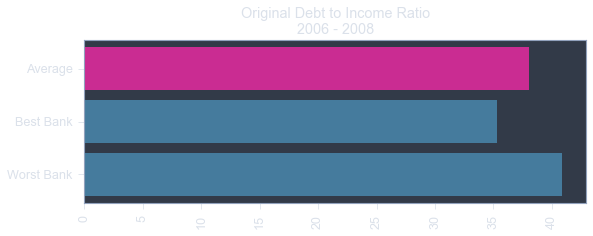

In [173]:
best_worst_gph('Original Debt to Income Ratio', df = dti, func = [min, max])

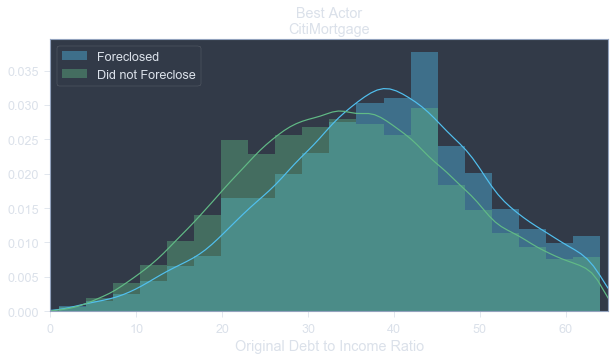

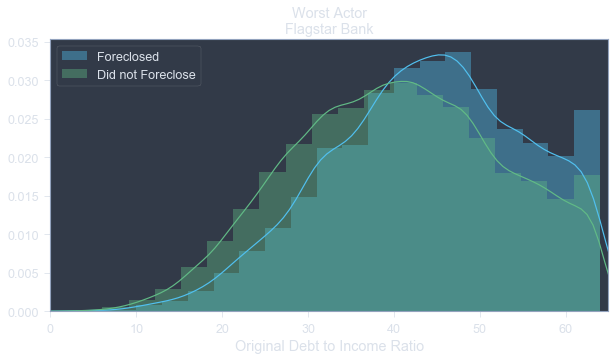

In [174]:
best_worst_density('Original Debt to Income Ratio', df, dti, func = [min, max], 
                   bins = 20, l_xlim=0, r_xlim=65)

### Predictions

In [ ]:
changed_assumptions_tbl('Original Debt to Income Ratio', improved, weakened)

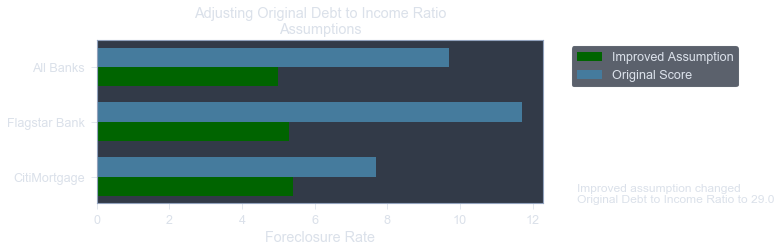

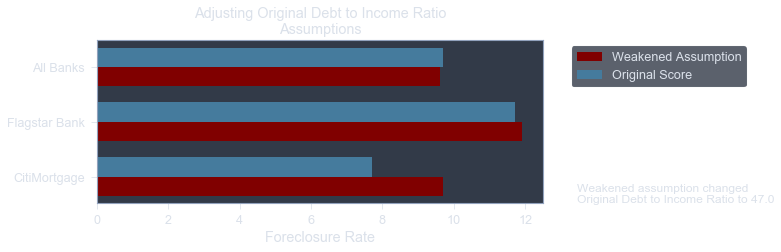

In [175]:
predicted_gph('Original Debt to Income Ratio', df = dti, proba = improved, proba_value = improved_values)

predicted_gph('Original Debt to Income Ratio', df = dti, proba = weakened, proba_value = weakened_values, 
              improved=False)

***

# Combined Loan to Value

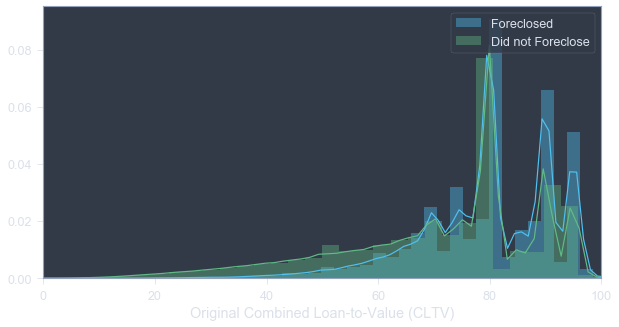

                   Original Combined Loan-to-Value (CLTV)
Foreclosed                                               
Did not Foreclose                                    71.3
Foreclosed                                           79.5


In [176]:
feature_density('Original Combined Loan-to-Value (CLTV)', bins=None, l_xlim=0, r_xlim=100)

,Original Combined Loan-to-Value (CLTV)
Average,72.0
GMAC Mortgage,69.8
CitiMortgage,70.7
JPMorgan Chase,72.0
Bank of America,72.3
SunTrust Mortgage,72.6
Flagstar Bank,73.4
PNC Bank,73.9
Wells Fargo Bank,73.9
AmTrust Bank,74.6


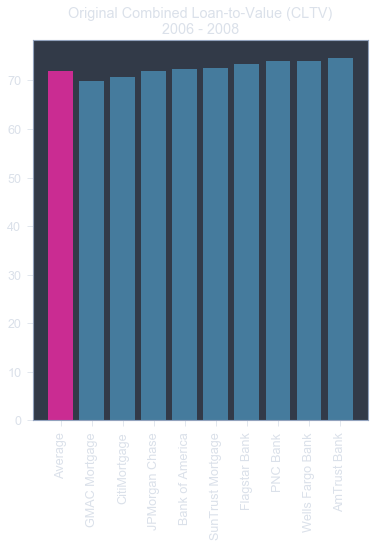

In [177]:
cltv = Bank_Data(df = df, allvars = True)[['Original Combined Loan-to-Value (CLTV)']]
bank_rank_gph('Original Combined Loan-to-Value (CLTV)', df, cltv)

,Bank,Original Combined Loan-to-Value (CLTV)
Worst Bank,AmTrust Bank,74.6
Best Bank,GMAC Mortgage,69.8
Average,Overall,72.0


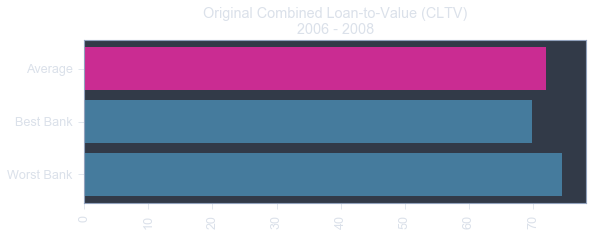

In [178]:
best_worst_gph('Original Combined Loan-to-Value (CLTV)', df = cltv, func = [min, max])

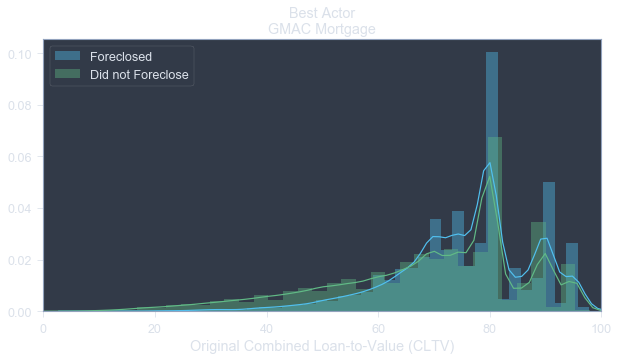

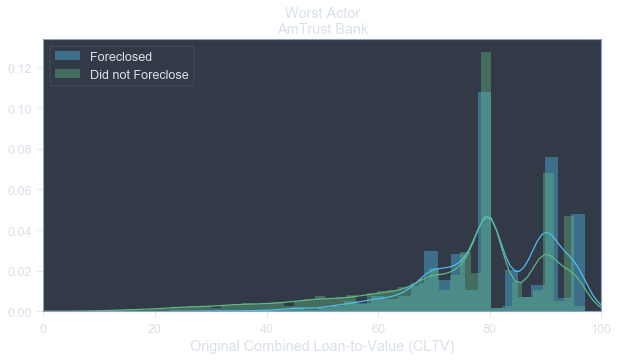

In [179]:
best_worst_density('Original Combined Loan-to-Value (CLTV)', df, cltv, func = [min, max], 
                   bins=None, l_xlim=0, r_xlim=100)

### Predictions

In [ ]:
changed_assumptions_tbl('Original Combined Loan-to-Value (CLTV)', improved, weakened)

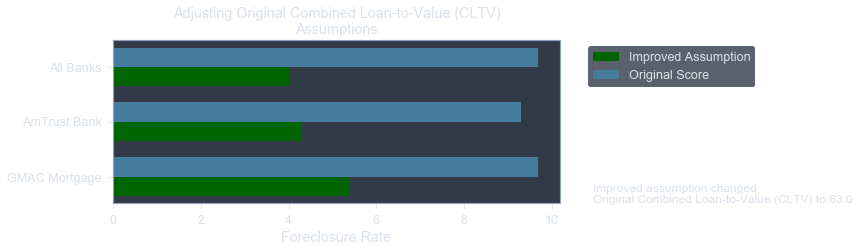

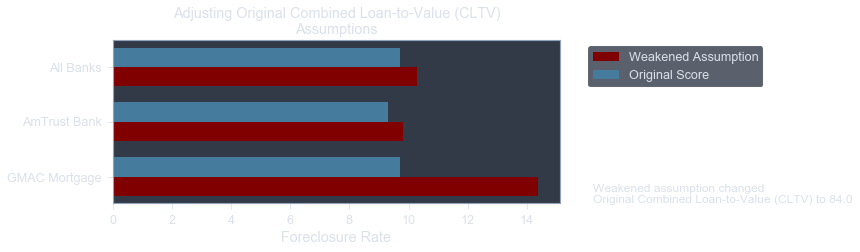

In [180]:
predicted_gph('Original Combined Loan-to-Value (CLTV)', df = cltv, 
              proba = improved, proba_value = improved_values)

predicted_gph('Original Combined Loan-to-Value (CLTV)', df = cltv, 
              proba = weakened, proba_value = weakened_values, improved=False)

***

# Median Household Income

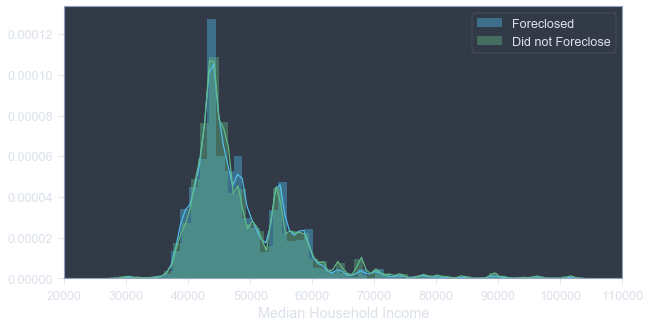

                   Median Household Income
Foreclosed                                
Did not Foreclose                 48797.97
Foreclosed                        48204.98


In [181]:
feature_density('Median Household Income', l_xlim=20000, r_xlim=110000)

,Median Household Income
Average,48740.00
SunTrust Mortgage,47263.55
AmTrust Bank,47708.53
Flagstar Bank,47920.06
PNC Bank,47951.92
JPMorgan Chase,48397.43
Bank of America,48567.87
Wells Fargo Bank,49196.66
GMAC Mortgage,49289.08
CitiMortgage,49490.66


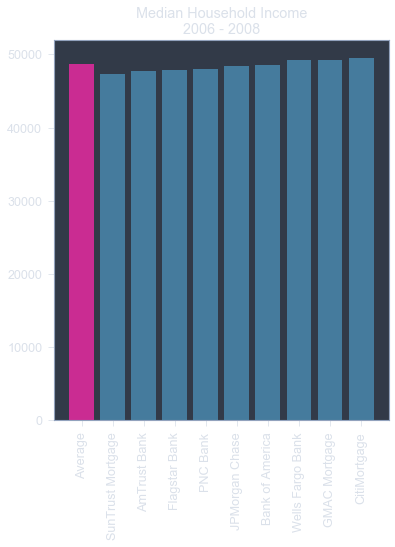

In [182]:
mhi = Bank_Data(df = df, allvars = True)[['Median Household Income']]
bank_rank_gph('Median Household Income', df, mhi)

,Bank,Median Household Income
Worst Bank,SunTrust Mortgage,47263.55
Best Bank,CitiMortgage,49490.66
Average,Overall,48420.00


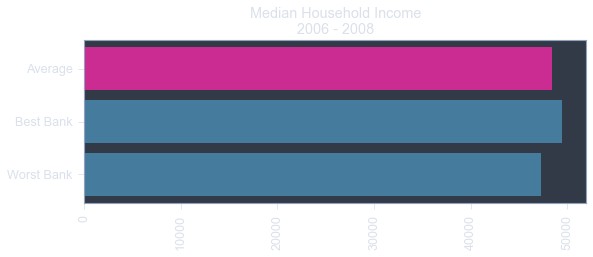

In [183]:
best_worst_gph('Median Household Income', df = mhi)

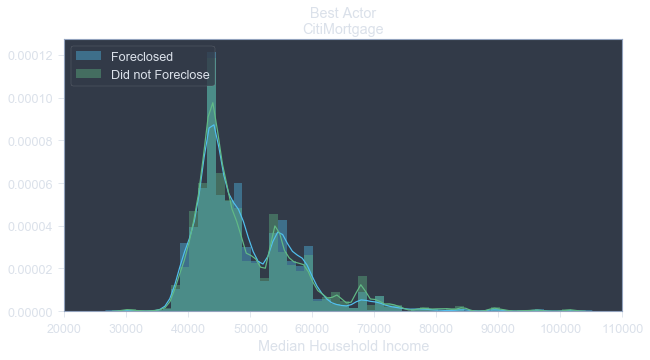

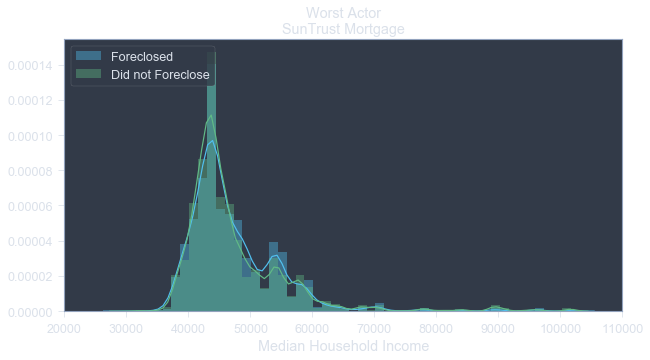

In [184]:
best_worst_density('Median Household Income', df, mhi, l_xlim=20000, r_xlim=110000)

### Predictions

In [ ]:
changed_assumptions_tbl('Median Household Income', improved, weakened)

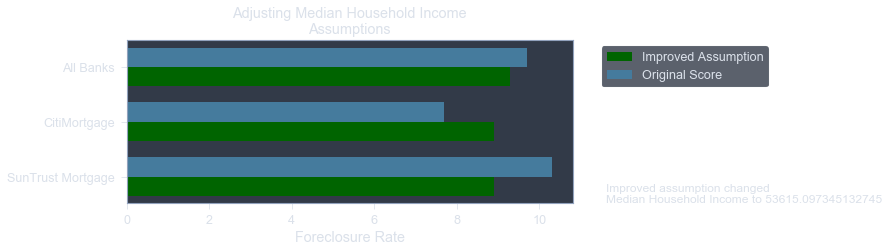

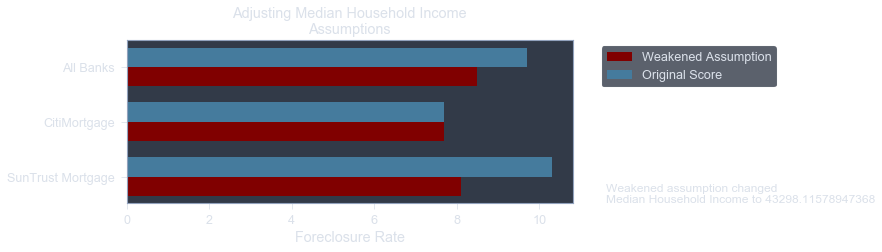

In [185]:
predicted_gph('Median Household Income', df = mhi, 
              proba = improved, proba_value = improved_values)

predicted_gph('Median Household Income', df = mhi, 
              proba = weakened, proba_value = weakened_values, improved=False)

Best and worst assumptions illustration

In [ ]:
changed_assumptions_tbl('Median Household Income', best, worst)

In [ ]:
predicted_gph('Median Household Income', df = mhi, 
              proba = best, proba_value = best_values)

predicted_gph('Median Household Income', df = mhi, 
              proba = worst, proba_value = worst_values, improved=False)

***

# Loan Change

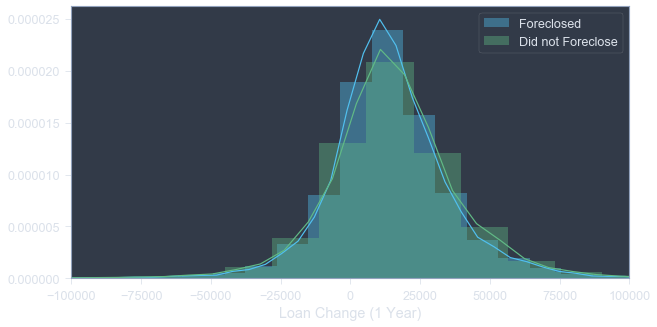

                   Loan Change (1 Year)
Foreclosed                             
Did not Foreclose              15410.44
Foreclosed                     13930.16


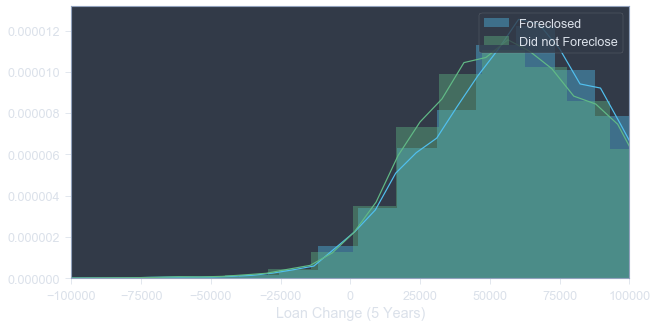

                   Loan Change (5 Years)
Foreclosed                              
Did not Foreclose               61932.22
Foreclosed                      63530.67


In [186]:
for v in ['Loan Change (1 Year)', 'Loan Change (5 Years)']:
    feature_density(v, l_xlim=-100000, r_xlim=100000)

,Loan Change (1 Year)
Average,15266.00
PNC Bank,5880.24
AmTrust Bank,7234.06
Flagstar Bank,11761.54
Bank of America,12967.53
SunTrust Mortgage,13497.83
CitiMortgage,17006.76
GMAC Mortgage,17232.85
Wells Fargo Bank,18325.46
JPMorgan Chase,19296.47


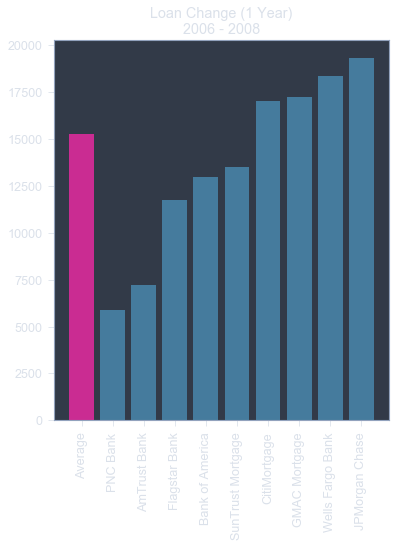

,Loan Change (5 Years)
Average,62087.00
AmTrust Bank,34663.51
Flagstar Bank,39533.37
PNC Bank,50746.67
SunTrust Mortgage,50797.33
Bank of America,52684.29
JPMorgan Chase,63666.73
GMAC Mortgage,65352.23
CitiMortgage,67493.36
Wells Fargo Bank,96423.40


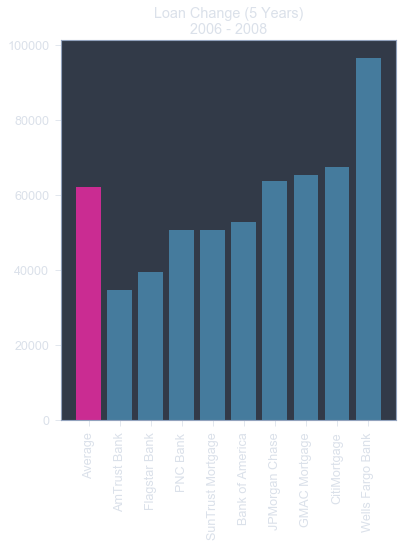

In [187]:
lc1 = Bank_Data(df = df, allvars = True)[['Loan Change (1 Year)']]
bank_rank_gph('Loan Change (1 Year)', df, lc1)

lc5 = Bank_Data(df = df, allvars = True)[['Loan Change (5 Years)']]
bank_rank_gph('Loan Change (5 Years)', df, lc5)

,Bank,Loan Change (1 Year)
Worst Bank,JPMorgan Chase,19296.47
Best Bank,PNC Bank,5880.24
Average,Overall,13689.00


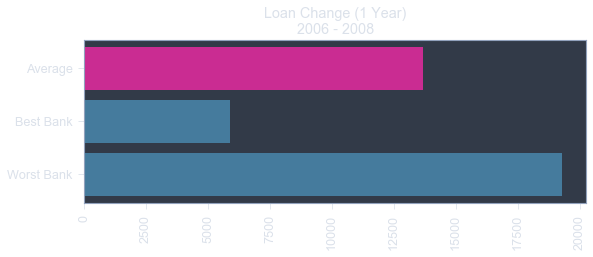

,Bank,Loan Change (5 Years)
Worst Bank,Wells Fargo Bank,96423.40
Best Bank,AmTrust Bank,34663.51
Average,Overall,57928.00


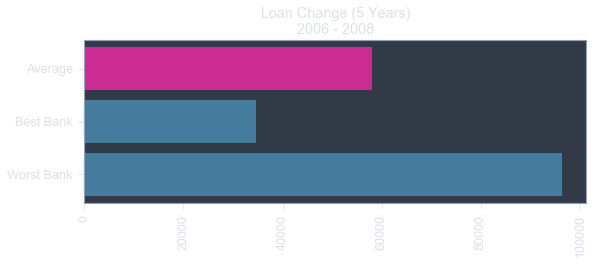

In [188]:
best_worst_gph('Loan Change (1 Year)', df = lc1, func = [min, max])

best_worst_gph('Loan Change (5 Years)', df = lc5, func = [min, max])

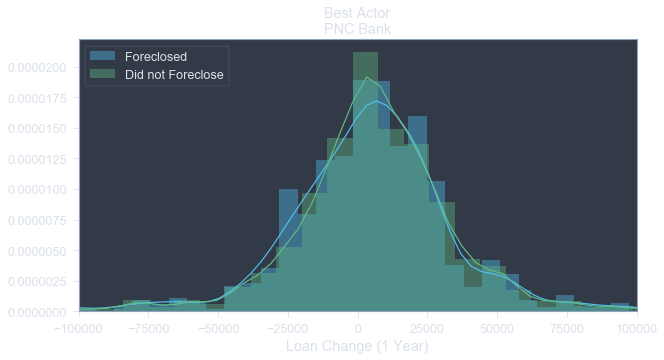

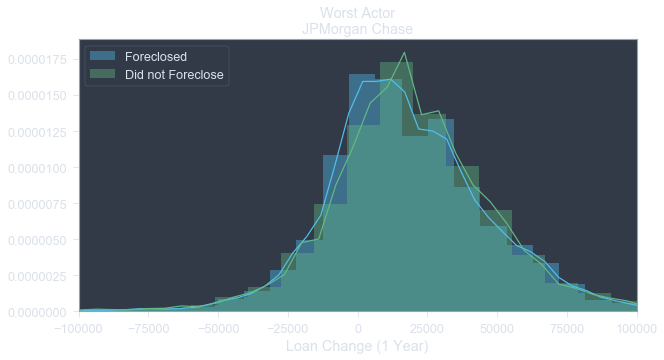

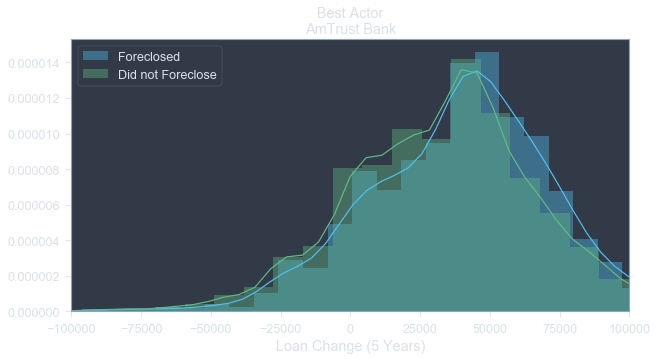

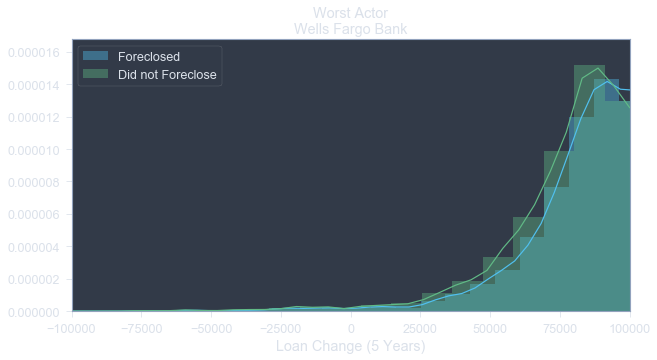

In [189]:
best_worst_density('Loan Change (1 Year)', df, lc1, func = [min, max], 
                           l_xlim=-100000, r_xlim=100000)

best_worst_density('Loan Change (5 Years)', df, lc5, func = [min, max], 
                           l_xlim=-100000, r_xlim=100000)

### Predictions

In [ ]:
changed_assumptions_tbl('Loan Change (1 Year)', improved, weakened)

In [190]:
predicted_gph('Loan Change (1 Year)', df = lc1, 
              proba = improved, proba_value = improved_values)

predicted_gph('Loan Change (1 Year)', df = lc1, 
              proba = weakened, proba_value = weakened_values, improved=False)

KeyError: 'Loan Change'

***

# Loan Liabilities

In [ ]:
for v in ['Lnlsnet (1 Yr)', 'Lnlsnet (5 Yr)']:
        display(feature_density(v, hist=False, l_xlim=-300, r_xlim=1000))

In [ ]:
lnl1 = Bank_Data(df = df, allvars = True)[['Lnlsnet (1 Yr)']]
display(bank_rank_gph('Lnlsnet (1 Yr)', df, lnl1, b_ylim=-500, t_ylim=4000))

lnl5 = Bank_Data(df = df, allvars = True)[['Lnlsnet (5 Yr)']]
display(bank_rank_gph('Lnlsnet (5 Yr)', df, lnl5, b_ylim=-500, t_ylim=4000))

In [ ]:
display(best_worst_gph('Lnlsnet (1 Yr)', lnl1, func = [min, max], l_xlim=-500, r_xlim=4000))

display(best_worst_gph('Lnlsnet (5 Yr)', lnl5, func = [min, max], l_xlim=-500, r_xlim=4000))

In [ ]:
display(best_worst_density('Lnlsnet (1 Yr)', df, lnl1, func = [min, max], 
                           hist=False, l_xlim=-300, r_xlim=1000))

display(best_worst_density('Lnlsnet (5 Yr)', df, lnl5, func = [min, max], 
                           hist=False, l_xlim=-300, r_xlim=1000))

### Predictions

In [ ]:
changed_assumptions_tbl('Lnlsnet (1 Yr)', improved, weakened)

In [ ]:
predicted_gph('Lnlsnet (1 Yr)', df = lnl1, 
              proba = improved, proba_value = improved_values)

predicted_gph('Lnlsnet (1 Yr)', df = lnl1, 
              proba = weakened, proba_value = weakened_values, improved=False)

Best and worst assumption illustration

In [ ]:
changed_assumptions_tbl('Lnlsnet (1 Yr)', best, worst)

In [ ]:
predicted_gph('Lnlsnet (1 Yr)', df = lnl1, 
              proba = best, proba_value = best_values)

predicted_gph('Lnlsnet (1 Yr)', df = lnl1, 
              proba = worst, proba_value = worst_values, improved=False)

***